In [27]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Préparation des données 

In [28]:
dataset_train = pd.read_csv('C:/Users/yazid/OneDrive/Bureau/Formation/P16-Recurrent-Neural-Networks/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv')

In [29]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


<Axes: xlabel='Date'>

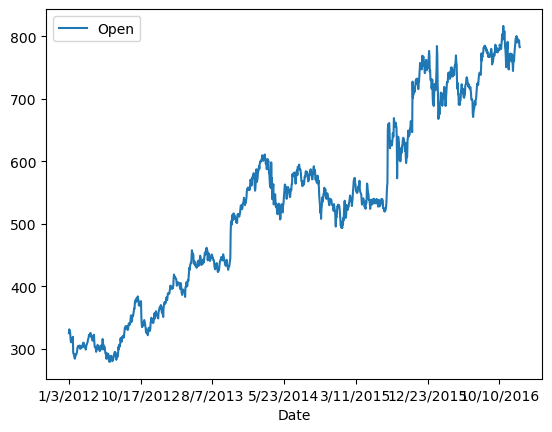

In [30]:
dataset_train.plot(x='Date',y='Open')

In [31]:
dataset_train


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [32]:
training_set = dataset_train[['Open']].values

In [33]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [34]:
#pour rnn il est préferable de choisir la normalisation 
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [35]:
# creation de la sctructure avec 60 timesteps et  1 sortie
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train) , np.array(y_train)

In [36]:
#ajouter une dimonsion 
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [37]:
X_train.shape

(1198, 60, 1)

# Construire RNN 

In [38]:
# Libraries 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout # pour éviter le surapprentisage 

In [39]:
# intialisation de notre rnn
regressor = Sequential()


In [40]:
#Couche lstm + drop out 
regressor.add(LSTM(units=50,return_sequences = True,
                   input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))# désactivé 20% des nouerone 

In [41]:
# 2 éme Couche lstm + drop out 
regressor.add(LSTM(units=50,return_sequences = True))
regressor.add(Dropout(0.2))

In [42]:
# 3 éme Couche lstm + drop out 
regressor.add(LSTM(units=50,return_sequences = True))
regressor.add(Dropout(0.2))

In [43]:
# 4 éme Couche lstm + drop out 
regressor.add(LSTM(units=50,return_sequences = False))
regressor.add(Dropout(0.2))

In [44]:
#couche de sortie 
regressor.add(Dense(units=1))

In [45]:
# compilation 
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [47]:
# entrianement 
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 84ms/step - loss: 0.0452
Epoch 2/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0042
Epoch 8/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0048
Epoch 13/100
38/38 [==

Epoch 100/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0016


# Prédiction et visualisation 

In [48]:
#données test 
dataset_test = pd.read_csv('C:/Users/yazid/OneDrive/Bureau/Formation/P16-Recurrent-Neural-Networks/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

<Axes: xlabel='Date'>

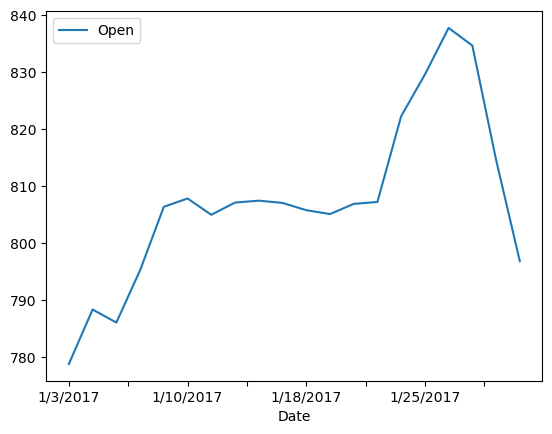

In [51]:
dataset_test.plot(x='Date',y='Open')

### prédiction pour janvier 2017 

In [54]:
dataset_total= pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)



In [55]:
inputs = dataset_total[len(dataset_total)- len(dataset_test)- 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [56]:
inputs.shape

(80,)

In [57]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [59]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(20, 60, 1)

In [60]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

1/1 [==============================] - 6s 6s/step


array([[788.3387 ],
       [785.5734 ],
       [785.20197],
       [786.2285 ],
       [789.25854],
       [794.7879 ],
       [800.32587],
       [803.1848 ],
       [803.9286 ],
       [803.6869 ],
       [803.26434],
       [802.8931 ],
       [802.7018 ],
       [803.18463],
       [804.14276],
       [808.23267],
       [814.7654 ],
       [822.19763],
       [826.92053],
       [824.2463 ]], dtype=float32)

# Visualisation des résultats

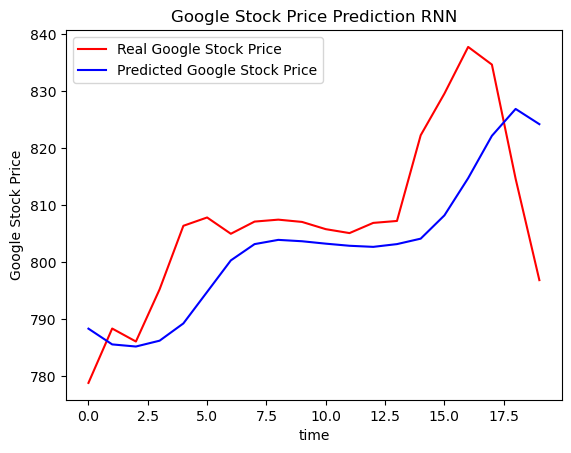

In [62]:
plt.plot(real_stock_price, color = 'red',
         label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue',
         label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction RNN')
plt.xlabel('time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()